## Importing the dataset && properties

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [300]:
dataset= pd.read_csv('housing_price_dataset.csv')


In [331]:
len(dataset)

199

In [302]:
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4.0,1.0,Rural,1969,215355.283618
1,2459,NaN,2.0,Rural,1980,195014.221626
2,1860,2.0,1.0,NaN,1970,306891.012076
3,2294,2.0,NaN,Urban,1996,206786.787153
4,2130,5.0,2.0,Suburb,2001,272436.239065


In [332]:
dataset.head(7)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4.0,1.0,Rural,1969,215355.283618
1,2459,NaN,2.0,Rural,1980,195014.221626
2,1860,2.0,1.0,NaN,1970,306891.012076
3,2294,2.0,NaN,Urban,1996,206786.787153
4,2130,5.0,2.0,Suburb,2001,272436.239065
5,2095,2.0,3.0,Suburb,2020,198208.803907
6,2724,2.0,1.0,Suburb,1993,343429.319110


In [304]:
dataset.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,199.000000,186.000000,186.000000,199.000000,199.000000
mean,1993.035176,3.612903,2.064516,1985.331658,221820.665405
std,563.857246,1.105585,0.829281,20.487507,77632.540255
min,1013.000000,2.000000,1.000000,1950.000000,51154.131130
25%,1505.000000,3.000000,1.000000,1966.000000,164857.087362
50%,1995.000000,4.000000,2.000000,1986.000000,216771.359956
75%,2485.000000,5.000000,3.000000,2002.000000,276298.700875
max,2981.000000,5.000000,3.000000,2021.000000,427295.404603


In [305]:
dataset.dtypes

SquareFeet        int64
Bedrooms        float64
Bathrooms       float64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [333]:
dataset.isnull()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,False,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,True,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
194,False,False,False,False,False,False
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,True,False,False,False


In [307]:
dataset.isnull().any()

SquareFeet      False
Bedrooms         True
Bathrooms        True
Neighborhood     True
YearBuilt       False
Price           False
dtype: bool

In [308]:
dataset.isnull().sum()

SquareFeet       0
Bedrooms        13
Bathrooms       13
Neighborhood     6
YearBuilt        0
Price            0
dtype: int64

In [309]:
dataset.isnull().sum().sum()

32

## Taking care of missing data

In [310]:
dataset = pd.read_csv('housing_price_dataset.csv') 
X = dataset.iloc[:,:].values  ## convert data from dataframes to numpy 
X[:, :]

array([[2126, 4.0, 1.0, 'Rural', 1969, 215355.28361820136],
       [2459, nan, 2.0, 'Rural', 1980, 195014.22162584803],
       [1860, 2.0, 1.0, nan, 1970, 306891.0120763329],
       ...,
       [2598, 3.0, 3.0, 'Urban', 2020, 207377.55545532453],
       [1863, 4.0, nan, 'Suburb', 1990, 267934.0925699399],
       [1742, 5.0, 1.0, 'Urban', 1993, 235034.89983819608]], dtype=object)

In [311]:
## fill missing values 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
X[:, [1,2]] = imputer.fit_transform(X[:, [1,2]])

In [312]:
print(X)

[[2126 4.0 1.0 'Rural' 1969 215355.28361820136]
 [2459 3.6129032258064515 2.0 'Rural' 1980 195014.22162584803]
 [1860 2.0 1.0 nan 1970 306891.0120763329]
 ...
 [2598 3.0 3.0 'Urban' 2020 207377.55545532453]
 [1863 4.0 2.064516129032258 'Suburb' 1990 267934.0925699399]
 [1742 5.0 1.0 'Urban' 1993 235034.89983819608]]


In [313]:

##  to give messing of Neighborhood by most-frequent

imputer_year = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[:, [3]] = imputer_year.fit_transform(X[:, [3]])



In [314]:
print (X)

[[2126 4.0 1.0 'Rural' 1969 215355.28361820136]
 [2459 3.6129032258064515 2.0 'Rural' 1980 195014.22162584803]
 [1860 2.0 1.0 'Urban' 1970 306891.0120763329]
 ...
 [2598 3.0 3.0 'Urban' 2020 207377.55545532453]
 [1863 4.0 2.064516129032258 'Suburb' 1990 267934.0925699399]
 [1742 5.0 1.0 'Urban' 1993 235034.89983819608]]


## Introduction to Visualizing Data

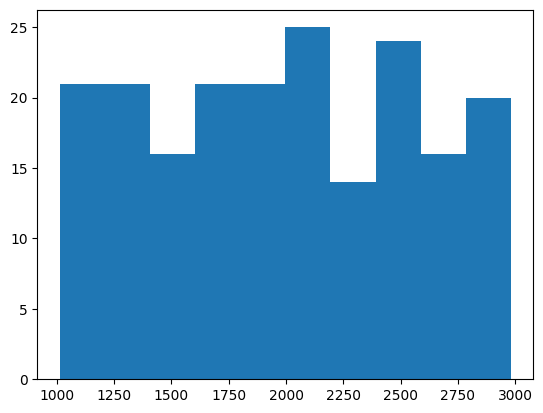

In [315]:
fig=plt.hist(dataset.SquareFeet) 

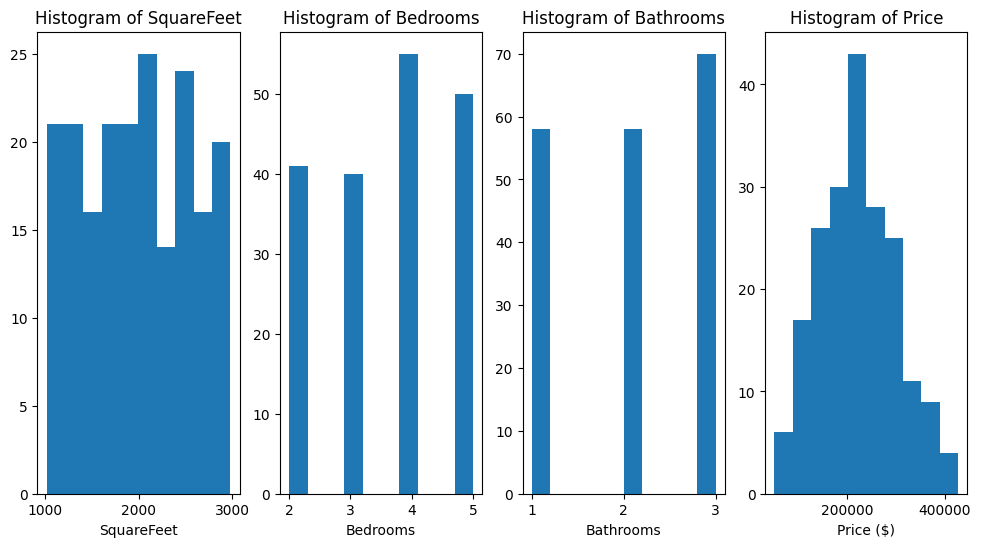

In [316]:
fig = plt.figure(figsize=(12, 6)) 
squareFeet = fig.add_subplot(141)
bedrooms= fig.add_subplot(142)
bathrooms= fig.add_subplot(143)
price= fig.add_subplot(144)

squareFeet.hist(dataset.SquareFeet, bins=10)
squareFeet.set_xlabel('SquareFeet')
squareFeet.set_title("Histogram of SquareFeet")

bedrooms.hist(dataset.Bedrooms, bins=10)
bedrooms.set_xlabel('Bedrooms')
bedrooms.set_title("Histogram of Bedrooms")

bathrooms.hist(dataset.Bathrooms, bins=10)
bathrooms.set_xlabel('Bathrooms')
bathrooms.set_title("Histogram of Bathrooms")


price.hist(dataset.Price, bins=10)
price.set_xlabel('Price ($)')
price.set_title("Histogram of Price")

plt.show()


## Feature Scaling

Text(0, 0.5, 'Price')

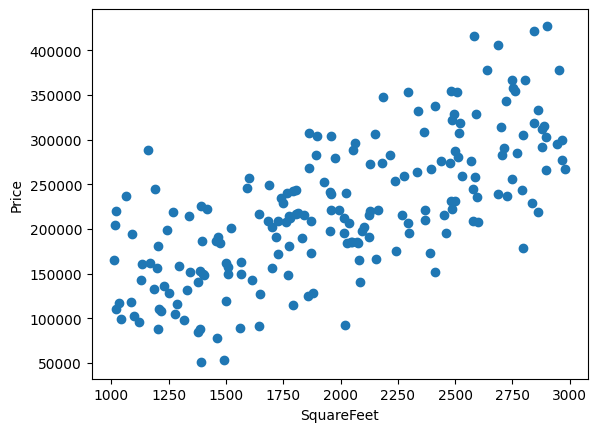

In [317]:
fig = plt.scatter(dataset.SquareFeet, dataset.Price)
plt.xlabel('SquareFeet')
plt.ylabel('Price')


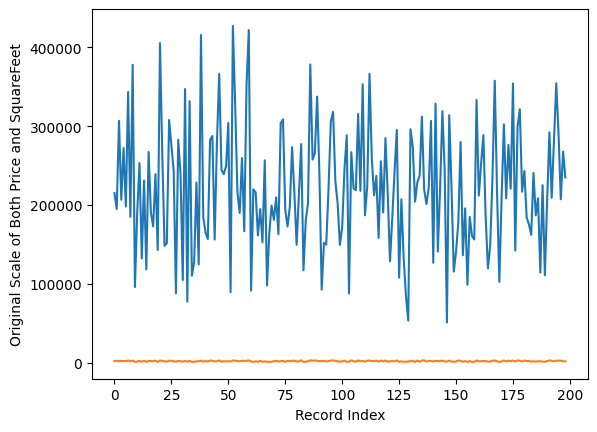

In [318]:
plt.plot(dataset.Price)
plt.plot(dataset.SquareFeet)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Price and SquareFeet')
plt.show()

In [319]:


#Reload the array from the dataframe
X = dataset.iloc[:, :].values
print(X[:, 0].min())
print(X[:, 0].max())
print(X[:, 5].min())
print(X[:, 5].max())

1013
2981
51154.13113008726
427295.4046033164


## Encoding Categorical


In [320]:
## CHeck null values
X = dataset.iloc[:,:].values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
X[:, [1,2]] = imputer.fit_transform(X[:, [1,2]])


imputer_year = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[:, [3]] = imputer_year.fit_transform(X[:, [3]])

## Encoding Categorical
ct = ColumnTransformer(
                        transformers=[
                                        (
                                            'encoder', 
                                            OneHotEncoder(), 
                                            [3]
                                        )
                        ], 
                        remainder='passthrough'
                    )
X = ct.fit_transform(X)

In [321]:
print(X)

[[1.0 0.0 0.0 ... 1.0 1969 215355.28361820136]
 [1.0 0.0 0.0 ... 2.0 1980 195014.22162584803]
 [0.0 0.0 1.0 ... 1.0 1970 306891.0120763329]
 ...
 [0.0 0.0 1.0 ... 3.0 2020 207377.55545532453]
 [0.0 1.0 0.0 ... 2.064516129032258 1990 267934.0925699399]
 [0.0 0.0 1.0 ... 1.0 1993 235034.89983819608]]


## Regression

In [322]:

Feature = X[:,[3]] 
Lebel= X[:,-1] 






In [323]:
#splitting the dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(Feature, Lebel, test_size=1/3, random_state=0)

In [324]:

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [325]:
y_pred = regressor.predict(X_test)


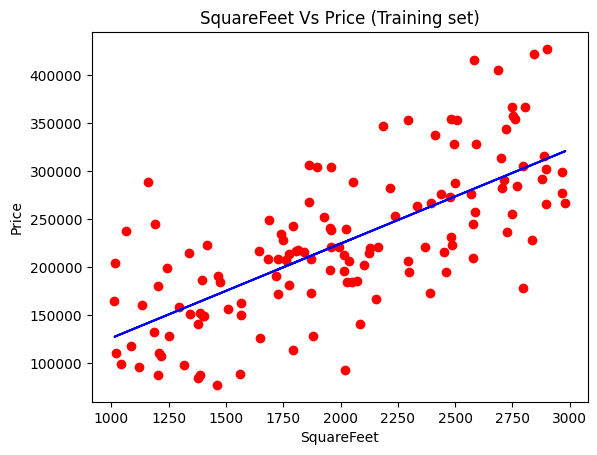

In [326]:
#visualising The training set result
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("SquareFeet Vs Price (Training set)")
plt.xlabel('SquareFeet')
plt.ylabel("Price")
plt.show()

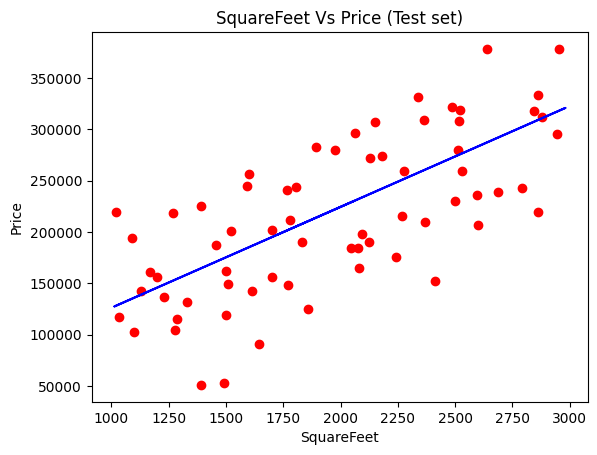

In [327]:
#visualising The Test set result
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("SquareFeet Vs Price (Test set)")
plt.xlabel('SquareFeet')
plt.ylabel("Price")
plt.show()

In [328]:
# Evaluate Linear Regression model           Review
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
print("mean squared error:", rmse_linear)

mean= mean_absolute_error(y_test, y_pred)
print("mean abolute error:", mean)

mean squared error: 54444.920689077655
mean abolute error: 46449.831299255806


In [329]:
 ##  R-squared
r2_linear = r2_score(y_test,  y_pred)
print("Linear Regression R-squared:", r2_linear)

Linear Regression R-squared: 0.47719052021219577


In [330]:
 # predic new value
new_features =np.array([4000])
new_features_reshaped = new_features.reshape(-1, 1)
y_pred = regressor.predict(new_features_reshaped)
print(y_pred)

[421029.18078643]
